In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn

In [2]:
dataset = pd.read_csv('IFND_3.csv',encoding='ISO 8859-1')

In [3]:
dataset.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


In [4]:
dataset.shape

(38561, 7)

In [5]:
#checking empty values

dataset.isna().sum()

id               0
Statement        0
Image            0
Web              0
Category        68
Date         11167
Label          197
dtype: int64

In [6]:
dataset.dropna(axis = 0, inplace = True)

In [7]:
dataset.shape

(27197, 7)

In [8]:
dataset.isna().sum()

id           0
Statement    0
Image        0
Web          0
Category     0
Date         0
Label        0
dtype: int64

In [9]:
dataset

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE
...,...,...,...,...,...,...,...
38556,56711,Fact Check: This is not Bruce Lee playing ping...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,Nov-19,Fake
38557,56712,Fact Check: Did Japan construct this bridge in...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,Oct-19,Fake
38558,56713,Fact Check: Viral video of Mexico earthquake i...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,Oct-19,Fake
38559,56714,Fact Check: Ballet performance by Chinese coup...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,Sep-19,Fake


In [10]:
dataset.reset_index(inplace = True)

In [11]:
dataset

,index,id,Statement,Image,Web,Category,Date,Label
0,0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE
...,...,...,...,...,...,...,...,...
27192,38556,56711,Fact Check: This is not Bruce Lee playing ping...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,Nov-19,Fake
27193,38557,56712,Fact Check: Did Japan construct this bridge in...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,Oct-19,Fake
27194,38558,56713,Fact Check: Viral video of Mexico earthquake i...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,Oct-19,Fake
27195,38559,56714,Fact Check: Ballet performance by Chinese coup...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,Sep-19,Fake


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


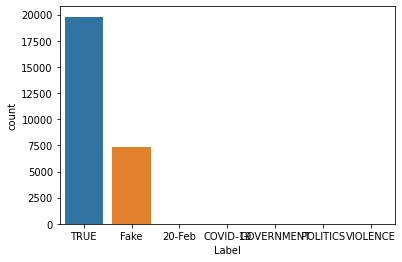

In [12]:
#balanced data or imbalanced

sns.countplot(dataset['Label'])

In [13]:
data = dataset['Statement'][0]
data

"WHO praises India's Aarogya Setu app, says it helped in identifying COVID-19 clusters"

In [14]:
#regular expression

import re

In [15]:
data = re.sub('[^a-zA-Z]', ' ' , data)

In [16]:
#changing to lower case

data = data.lower()
data

'who praises india s aarogya setu app  says it helped in identifying covid    clusters'

In [17]:
#split the text

list = data.split()
list

['who',
 'praises',
 'india',
 's',
 'aarogya',
 'setu',
 'app',
 'says',
 'it',
 'helped',
 'in',
 'identifying',
 'covid',
 'clusters']

In [18]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#remove the stopwords from the text if any 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [21]:
ps = PorterStemmer()

review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]

In [22]:
review

['prais',
 'india',
 'aarogya',
 'setu',
 'app',
 'say',
 'help',
 'identifi',
 'covid',
 'cluster']

In [23]:
' '.join(review)

'prais india aarogya setu app say help identifi covid cluster'

In [24]:
corpus = []

for i in range(0, len(dataset)):
  review = re.sub('[^a-zA-Z]' , ' ', dataset['Statement'][i])
  review = review.lower()
  list = review.split()
  review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
  corpus.append(' '.join(review))

In [25]:
corpus[0]

'prais india aarogya setu app say help identifi covid cluster'

In [26]:
corpus

['prais india aarogya setu app say help identifi covid cluster',
 'delhi deputi us secretari state stephen biegun pitch pax indo pacifica',
 'lac tension china strategi behind deliber fail talk india',
 'india sign document space cooper countri isro chief',
 'tamil nadu chief minist mother pass away',
 'bihar assembl elect tej pratap shift mahua hasanpur',
 'hathra case cbi reach victim villag visit crime scene',
 'rajasthan crime news karauli anoth elderli beaten death sikar five youth custodi',
 'mumbai bmc book penalis peopl step without face mask',
 'covid india singl day spike drop talli approach lakh',
 'amid stubbl burn delhi air qualiti deterior poor',
 'bihar assembl elect bjp expel nine rebel contest elect nda candid',
 'pm modi releas balasaheb vikh patil autobiographi',
 'post offic recruit big vacanc post th pass check elig pay scale',
 'mumbai power outag fire report hospit',
 'tamil nadu covid recoveri touch six lakh mark activ case',
 'indian export armenia increas thre

In [27]:
#bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
print(x.shape)
print(x)

(27197, 14337)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
x[0]

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y = dataset['Label']
print(y.shape)
x.shape

(27197,)


(27197, 14337)

In [30]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(dataset['Statement'],dataset['Label'],stratify=dataset['Label'])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [32]:
X_test[0]

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
X_train.shape

(18221, 14337)

In [34]:
X_test.shape

(8976, 14337)

In [35]:
Y_train

1836     TRUE
22512    Fake
26700    Fake
9355     TRUE
26200    Fake
         ... 
21575    Fake
5390     TRUE
860      TRUE
15795    TRUE
23654    Fake
Name: Label, Length: 18221, dtype: object

In [36]:
Y_test

8922     TRUE
25533    Fake
21344    Fake
10299    TRUE
13492    TRUE
         ... 
4601     TRUE
13506    TRUE
21555    Fake
22702    Fake
8268     TRUE
Name: Label, Length: 8976, dtype: object

In [37]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,Y_train)

MultinomialNB()

In [38]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
y_pred=classifier.predict(X_test)
print(y_pred)

['TRUE' 'Fake' 'TRUE' ... 'Fake' 'TRUE' 'TRUE']


[[2142    0  312    0]
 [   0    0    0    1]
 [ 255    0 6266    0]
 [   0    0    0    0]]


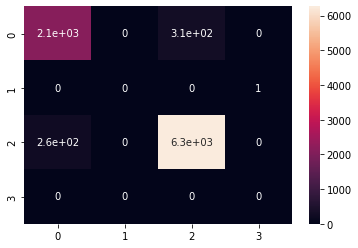

In [40]:
from sklearn.metrics  import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)

In [41]:
print(accuracy_score(Y_test,y_pred))

0.9367201426024956


## Testing for examples

In [42]:
#from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer


In [43]:
# test_input = ["Mumbai outage: After major blackout, power supply restored in most areas; Thackeray orders probe"]

# test_input_features = feature_extraction.transform(test_input)

# prediction = classifier.predict(test_input)
# print(prediction) 


In [46]:
import sklearn
test_new = [X_test[1000]]
prediction = classifier.predict(test_new)

print(prediction)



['TRUE']
